# Activité 1: manipuler une image

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import random
from PIL import Image, ImageFilter

fonction d'ajout de bruit gaussien

In [3]:
def add_gauss_noise(img, variance):
    img = np.array(img)
    noise = np.random.normal(0, variance, img.shape)
    noisy_img = Image.fromarray(img + noise).convert('L')
    return noisy_img

fonction d'ajoute de bruit implulsionnel

In [4]:
def add_imp_noise(img, density):
    row, col = img.size
    number_of_pixels = int(density * 100)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img.putpixel((y_coord, x_coord), 255)
    for i in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, col - 1)
        img.putpixel((y_coord, x_coord), 0)
    return img

importer l'image de Lenna

Image origine


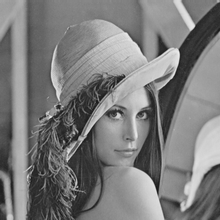

In [5]:
img = Image.open("./tsawer/fatchat.png")
img = img.convert('L')
print("Image origine")
display(img)

ajout de bruit gaussien au image de lenna

image avec bruit gaussien


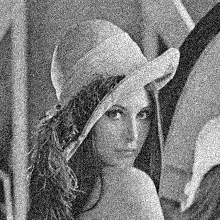

In [6]:
img_gauss_noise = add_gauss_noise(img, 20)
print("image avec bruit gaussien")
display(img_gauss_noise)

ajoute de bruit implulsionnel au image de lenna

image avec bruit implulsionnel


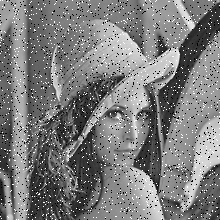

In [7]:
img_imp_noise = add_imp_noise(img, 20)
print("image avec bruit implulsionnel")
display(img_imp_noise)

filtrage d'image avec bruit implulsionnel

image filtré d'un bruit implulsionnel


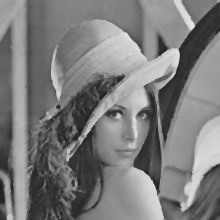

In [8]:
filtre_img_imp_noise = img_imp_noise.filter(ImageFilter.MedianFilter(size = 3))
print("image filtré d'un bruit implulsionnel")
display(filtre_img_imp_noise)

filtrage d'image avec bruit gaussien

image filtré d'un bruit gaussien


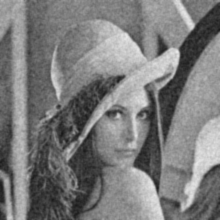

In [9]:
filtre_img_gauss_noise = img_gauss_noise.filter(ImageFilter.GaussianBlur(radius = 0.9))
print("image filtré d'un bruit gaussien")
display(filtre_img_gauss_noise)

# Activité 2: filtrage d'une image

générer un filtre gaussien

image filtré d'un bruit gaussien


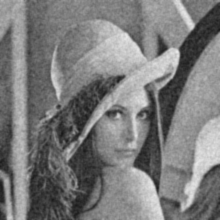

In [10]:
Image_filter_gauss = img_gauss_noise.filter(ImageFilter.GaussianBlur(radius = 0.9))
print("image filtré d'un bruit gaussien")
display(Image_filter_gauss)

générer le noyau d'un filter moyen

image filtré avec filter moyen


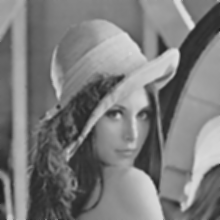

In [11]:
Image_filter_noyau_moyen = filtre_img_imp_noise.filter(ImageFilter.Kernel((3, 3), (1, 1, 1, 1, 1, 1, 1, 1, 1)))
print("image filtré avec filter moyen")
display(Image_filter_noyau_moyen)

Interprétation


# Activité 3: detection de contours

fonction Seuillage

In [13]:
from PIL import Image, ImageFilter
import numpy as np
def Seuillage(img, seuil):
    imagex = img.filter(ImageFilter.Kernel((seuil, seuil), (-1, 0, 1, -2, 0,2, -1, 0, 1), 1, 0))
    imagey = img.filter(ImageFilter.Kernel((seuil, seuil), (-1, -2, -1, 0, 0,0, 1, 2, 1), 1, 0))
    im1arr = np.asarray(imagex)
    im2arr = np.asarray(imagey)
    addition = im1arr + im2arr
    img_res = Image.fromarray(addition)

    return img_res

test de fonction de seillage

image originale


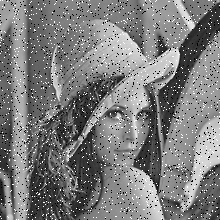

image filtré


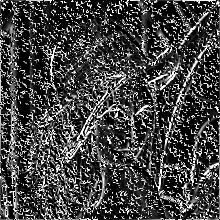

In [14]:
img_filter = Seuillage(img, 3)
print("image originale")
display(img)
print("image filtré")
display(img_filter)